### Quick data analysis###

In [3]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [4]:
#data reader
def read_data(filename):#read the file based on it's filetype
    if filename.endswith('.txt'):
        return pd.read_table(filename)
    if filename.endswith('.csv'):
        return pd.read_csv(filename)
    if filename.endswith('.xlsx'):
        return pd.read_excel(filename)
#create labels of data columns, if there is no class column one is created filled with zeros and named 'No Class'    
def createLabels(data, classes_exist):
    all_labels=list(data.columns)# take the headers from the data as a list of strings
    if classes_exist==False:
        all_labels.append('No class')
        zeros={'No class': np.zeros(len(data),dtype=np.int8)}
        zeros=pd.DataFrame(data=zeros)
        
    data_labels=all_labels[0:-1]
    class_label=all_labels[-1]
    if classes_exist==False:
        data=pd.concat([data[data_labels], zeros], axis=1)
    return data, data_labels, class_label

#Creates a pairplot of all data given to it
def pairplot(data):
    sns.pairplot(data)

# calculates the zscore of the data, based on the labels of the data columns
def z_score(data, data_labels):
    return scipy.stats.zscore(data[data_labels])

def pca2D(data,  classification=None): #data and the headers for data
    pca = PCA(n_components=2)#principal component analysis with 2 components
    principalComponents = pca.fit_transform(data) #pca fit
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    if (classification is not None): #if the header has elements, then it's appended
        principalDf=pd.concat([principalDf,classification], axis=1)
    return principalDf

def pcaPlot(principalDf, colors=None):#scatteplot pca, with colors based on class
    if str(colors)=='No class': #If there is no classes for the data already it's not possible to color them based on class
        colors=None
    sns.scatterplot('principal component 1', 'principal component 2', data=principalDf, hue=colors, palette='rainbow')

def k_Mean(data,data_labels,k): #partition the data to k clusters
    Kmean = KMeans(n_clusters=k)
    k_Mean_var=Kmean.fit(data[data_labels])
    return k_Mean_var

#call k_Mean and calculate the silhouette score for a given amount of clusters
def silhouette_score_kMean(data,data_labels,k ): 
    k_Mean_var=k_Mean(data, data_labels, k)
    return sklearn.metrics.silhouette_score(data[data_labels], k_Mean_var.labels_ )

#using the data look for the best amount of clusters by seeking the k value with the best silhouette score
def find_best_cluster_n(data, data_labels, n_clusters):# find the best k value between 2 and n_clusters
    sil_score_array=[]
    for n in range (2,n_clusters):
        a=silhouette_score_kMean(data,data_labels,n )
        sil_score_array.append(a)
    three_best_cluster_n=np.argsort(sil_score_array)[::-1][:3]
    return sorted(sil_score_array, reverse=True)[0:3], [x+2 for  x in three_best_cluster_n] 
    # returns the best three silhouette scores and the number of clusters k that produced them


    

           A       B       C       D       E       F
0         76  531510  399093  801261  276599  624952
1        129  548399  403838  784091  318408  599962
2        751  541309  411111  793410  300769  615462
3        767  524072  421517  823995  313295  598779
4       2346  537159  391569  799498  268193  614385
...      ...     ...     ...     ...     ...     ...
4046  672434  293894  635297  935808   14248  782092
4047  672942  286315  653246  930787   49861  780006
4048  674030  300464  647263  929180   32790  788307
4049  678640  327169  647480  935956   36961  790261
4050  681701  316964  644370  943691   36860  772380

[4051 rows x 6 columns]
Best silhouette_scores  [0.9300594512121639, 0.9298065272258823, 0.8741411735723291]
Best k_values  [10, 9, 8]


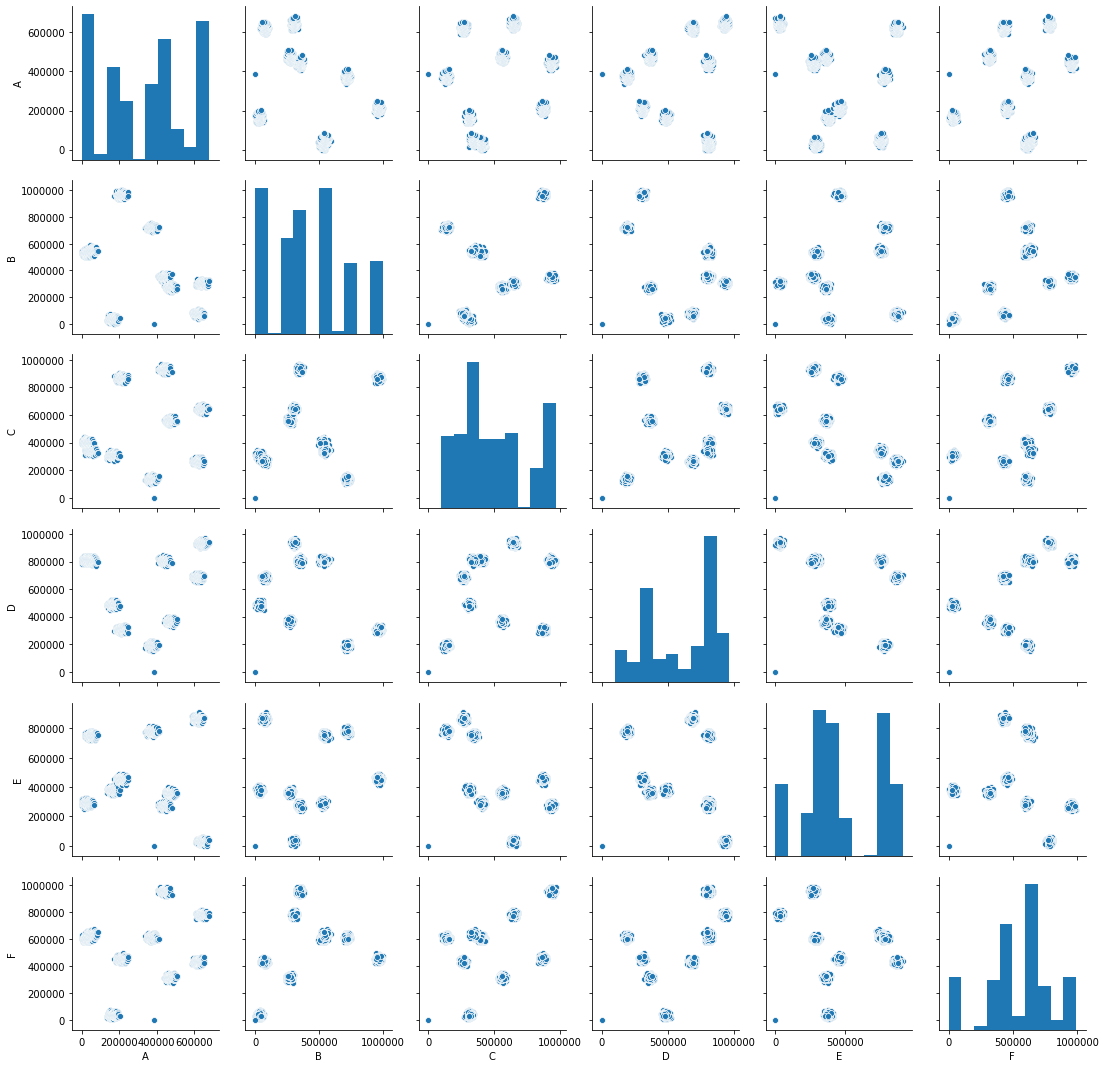

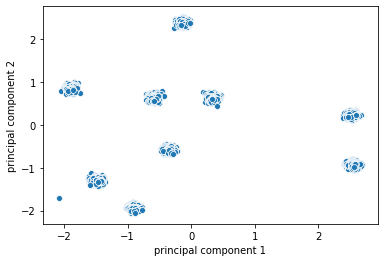

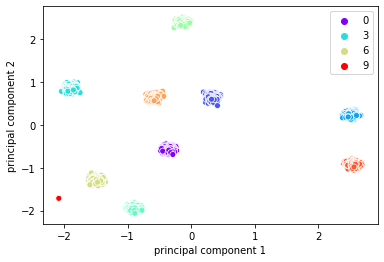

In [5]:
data=read_data('dim6.txt')# read data
classes_exist=False #If the data does already have classes, like in the IRIS dataset, then this must be True


data, data_labels, class_label= createLabels(data, classes_exist)    
print(data[data_labels]) #Printing the data column labels and data to check that they are correct, each column must be named

data_zscore=z_score(data,data_labels) #zscore normalization of data, results in a numpy array

sns.pairplot(data[data_labels]) #plot pairs of each data for quick visual analysis

plt.figure()# makes a new figure

pcaPlot(pca2D(data_zscore, data[class_label]), class_label) #plot pca scatterplot with the actual classes if they exist

#find the best amount of clusters based on the best silhouette score, returns three best values, uses kNN-method
score, k_val = find_best_cluster_n(data,data_labels,20) # looking for clusters between 2 and 20 
print('Best silhouette_scores ', score)
print('Best k_values ' ,k_val)

plt.figure()

pcaPlot(pca2D(data_zscore, data[class_label]), k_Mean(data, data_labels, k_val[0]).labels_) #plot the best clustering

